## Traffic Signals Classification 

#### Dataset From : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

## The German Traffic Sign Benchmark is a multi-class, single-image classification 

### The benchmark has the following properties:

#### Single-image, multi-class classification problem
#### More than 40 classes
#### More than 50,000 images in total
#### Large, lifelike database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Accessing Data

In [2]:
data = pd.read_csv('Train.csv')
data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [38]:
data['Path'][0]

'Train/20/00020_00000_00000.png'

#### Plotting Image

In [4]:
img = plt.imread(data['Path'][10])

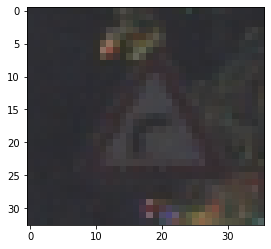

In [5]:
plt.imshow(img)

In [6]:
np.max(data['Height'])

225

In [7]:
np.min(data['Height'])

25

In [8]:
np.max(data['Width'])

243

In [9]:
np.min(data['Width'])

25

In [10]:
data['Height'].value_counts()

33     1380
31     1368
34     1335
36     1301
35     1300
       ... 
200       1
172       1
138       1
196       1
211       1
Name: Height, Length: 176, dtype: int64

In [11]:
data['Width'].value_counts()

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
126       1
183       1
185       1
196       1
221       1
Name: Width, Length: 187, dtype: int64

In [12]:
data[data["Height"]==33]['Width'].shape

(1380,)

### Resizing Image:

In [13]:
from skimage.transform import resize
from skimage.color import rgb2gray
reduced_img = resize(img,(33,33))
red_gray_img = rgb2gray(reduced_img)

In [14]:
red_gray_img = np.array(red_gray_img)

In [15]:
red_gray_img = np.reshape(red_gray_img,[33,33,1])

In [16]:
red_gray_img.shape

(33, 33, 1)

### Append all Resized Images

In [17]:
y = data['ClassId']

In [18]:
len(data)

39209

In [19]:
pixels = []
for i in range(len(data)):
    img = plt.imread(data['Path'][i])
    reduced_img = resize(img,(33,33))
    gray_img = rgb2gray(reduced_img)
    gray_red_img = np.reshape(np.array(gray_img),[33,33,1])
    pixels.append(gray_red_img)

In [20]:
pixels = np.array(pixels)
print(pixels.shape)

(39209, 33, 33, 1)


In [21]:
y.shape

(39209,)

#### Splitting Images into Train and Test images for Validation Purposes

In [22]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)
x_train,x_test,y_train,y_test = train_test_split(pixels,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

2022-07-08 22:55:56.432640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-08 22:55:56.432657: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(39209, 43)
(31367, 33, 33, 1)
(7842, 33, 33, 1)
(31367, 43)


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Dense,Flatten,Activation
from keras import callbacks

## CNN Model Creation

In [24]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,input_shape=pixels.shape[1:],activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(43,kernel_initializer='uniform'))
model.add(Activation('softmax'))
model.summary()




class myCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.038):
            print("\nReached 98% val_accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                        

2022-07-08 22:55:58.877631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 22:55:58.877799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-08 22:55:58.877840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-08 22:55:58.877877: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-08 22:55:58.877912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])b

### Model Creation Complete. Now Fitting

In [26]:
model.fit(pixels,y,batch_size =128, epochs= 10,validation_data=[x_test,y_test],callbacks=[callback])

Epoch 1/10
307/307 [==============================] - 25s 81ms/step - loss: 0.5111 - accuracy: 0.8646 - val_loss: 3.2134 - val_accuracy: 0.2079
Epoch 2/10
307/307 [==============================] - 25s 81ms/step - loss: 0.0546 - accuracy: 0.9846 - val_loss: 0.1593 - val_accuracy: 0.9848
Epoch 3/10
306/307 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9919
Reached 98% val_accuracy so cancelling training!
307/307 [==============================] - 24s 79ms/step - loss: 0.0287 - accuracy: 0.9919 - val_loss: 0.0344 - val_accuracy: 0.9921


#### Accessing Test-Data

In [27]:
test_data = pd.read_csv('Test.csv')

In [28]:
test_data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [29]:
pixels_test = []
test_y = test_data['ClassId']
for i in range(len(test_data)):
    img = plt.imread(test_data['Path'][i])
    reduced_img = resize(img,(33,33))
    gray_img = rgb2gray(reduced_img)
    gray_red_img = np.reshape(np.array(gray_img),[33,33,1])
    pixels_test.append(gray_red_img)

In [30]:
pixels_test = np.array(pixels_test)
print(pixels_test.shape)

(12630, 33, 33, 1)


### Predicting for Test-Data

In [31]:
y_pred = model.predict(pixels_test)

395/395 [==============================] - 2s 5ms/step


In [32]:
y_prediction = [np.argmax(i) for i in y_pred]

In [33]:
def input(img):
    path = img
    pixels_test = []
    for i in path:
        img = plt.imread(i)
        reduced_img = resize(img,(33,33))
        gray_img = rgb2gray(reduced_img)
        gray_red_img = np.reshape(np.array(gray_img),[1,33,33,1])
#         pixels_test.append(gray_red_img)
#         print(pixels_test)
        y_pred = model.predict(gray_red_img)
        print()
        print("Image:",i," Belongs to Category :",np.argmax(y_pred))
        print()

In [34]:
input(test_data['Path'][1:10])

1/1 [==============================] - 0s 10ms/step

Image: Test/00001.png  Belongs to Category : 1

1/1 [==============================] - 0s 10ms/step

Image: Test/00002.png  Belongs to Category : 38

1/1 [==============================] - 0s 10ms/step

Image: Test/00003.png  Belongs to Category : 33

1/1 [==============================] - 0s 10ms/step

Image: Test/00004.png  Belongs to Category : 11

1/1 [==============================] - 0s 12ms/step

Image: Test/00005.png  Belongs to Category : 38

1/1 [==============================] - 0s 10ms/step

Image: Test/00006.png  Belongs to Category : 18

1/1 [==============================] - 0s 10ms/step

Image: Test/00007.png  Belongs to Category : 12

1/1 [==============================] - 0s 10ms/step

Image: Test/00008.png  Belongs to Category : 25

1/1 [==============================] - 0s 11ms/step

Image: Test/00009.png  Belongs to Category : 35



### Saving Model as JSON with weights included

In [35]:
model_json = model.to_json()

In [36]:
with open('traffic_signal_model.json','w') as json_file:
    json_file.write(model_json)

In [37]:
model.save_weights("traffic_signal_model.h5")
